<a href="https://colab.research.google.com/github/katsuki-nagakubo/Tweets_Word2vec/blob/master/trump_tweets_s%26p500_relation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#„Éá„Éº„Çø„ÅÆÂèñÂæó„Å®ÊàêÂΩ¢

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#https://teratail.com/questions/128725

from ast import literal_eval
from pprint import pprint

f = open('/content/trump_tweets.txt', 'r')
text = f.read()
mylist = literal_eval(text)

print(type(mylist), type(mylist[0]))

<class 'list'> <class 'dict'>


In [3]:
df_text=[]
df_created_at=[]
df_id_str=[]

print(len(mylist),"tweets")

for i in range(len(mylist)):
    text = mylist[i]["text"]
    created_at = mylist[i]["created_at"]
    id_str = mylist[i]["id_str"]
    df_text.append(text)
    df_created_at.append(created_at)
    df_id_str.append(id_str)

tweet_list=[df_created_at,df_id_str,df_text]
#print(tweet_list)

17544 tweets


In [0]:
#https://ai-inter1.com/pandas-dataframe_basic/
#„É™„Çπ„ÉàÂûã„Å´„Åó„Åü„Éá„Éº„Çø„ÇíPandas„ÅßDataFrame„Å´„Åó„Åü

columns1=["created_at"]
tweet_data = pd.DataFrame( data = df_created_at, columns = columns1)
tweet_data["id"]=df_id_str
tweet_data["text"] = df_text

In [0]:
#https://teratail.com/questions/132333
#https://note.nkmk.me/python-pandas-datetime-timestamp/

tweet_data["time_created_at"] = pd.to_datetime(tweet_data['created_at'])
tweet_data["date_created_at"] = tweet_data["time_created_at"].dt.date
tweet_data["key"]=pd.to_datetime(tweet_data["date_created_at"])

In [0]:
# https://www.macrotrends.net/2488/sp500-10-year-daily-chart

sp_data = pd.read_csv('/content/sp500-10-year-daily-chart.csv')
sp_data["date_64"] = pd.to_datetime(sp_data["date"])
sp_data["key"] =sp_data["date_64"] 

In [7]:
#ÂÜÖÈÉ®ÁµêÂêà
#http://pppurple.hatenablog.com/entry/2016/06/27/022310#inner-join
#https://note.nkmk.me/python-pandas-merge-join/

tweet_data=pd.merge(tweet_data, sp_data)
tweet_data.columns
data = tweet_data[["key"," value","text"]]

#Ë°å„ÅÆÂêçÂâç„ÇíÂ§âÊõ¥„Åô„Çã„ÄÄ20200505
data = data.rename(columns={"key": "date"," value":"price"})
data.head()

date    price                                               text
0 2020-05-01  2830.71  RT @StevenTDennis: Trump gets bump in latest G...
1 2020-05-01  2830.71  The Governor of Michigan should give a little,...
2 2020-05-01  2830.71  Cryin Chuck Schumer, compared to what other Se...
3 2020-05-01  2830.71  Cryin‚Äô Chuck Schumer was on a late night show ...
4 2020-05-01  2830.71  RT @TeamTrump: President @realDonaldTrump: ‚ÄúWe...

In [8]:
# trump„ÅåÂ§ßÁµ±È†ò„Å´„Å™„Å£„Åü2017Âπ¥1Êúà20Êó•„Åã„Çâ„ÄÅGWÂâç2020Âπ¥5Êúà1Êó•„Åæ„Åß„ÅÆ„Éá„Éº„Çø„ÇíÂàÜÊûê„Åô„Çã
# https://qiita.com/mSpring/items/6ec1ab28dcb261db2c73

import datetime as dt
data2 = data[(data['date'] >= dt.datetime(2017,1,20)) & (data['date'] <= dt.datetime(2020,5,1))]
print( "2017/01/20 - 2020/05/01„ÅÆ„ÉÑ„Ç§„Éº„ÉàÊï∞„ÅØ", len(data2))

2017/01/20 - 2020/05/01„ÅÆ„ÉÑ„Ç§„Éº„ÉàÊï∞„ÅØ 12259


In [0]:
#Êñ∞„Åó„ÅÑ„Éá„Éº„Çø„ÇíËøΩÂä†„Åô„Çã„Å®‰∏äÊõ∏„Åç‰øùÂ≠ò„Åï„Çå„Çã„Çà„ÅÜ„Å´mode="a"„Å´„Åó„Åü„ÄÇ

#ÂàùÂõû„Å†„Åë,header„ÅØTrue
data2.to_csv("s&p_tweets.csv", index=False, mode='a', header=True)
#2ÂõûÁõÆ‰ª•Èôç„ÅØFalse
#data2.to_csv("s&p_tweets.csv", index=False, mode='a', header=False)

In [10]:
# File„ÇíË™≠„ÅøËæº„ÇÄ„Åì„Å®„ÅßÊúÄÊñ∞„ÅÆ„Éá„Éº„Çø„ÅßÂàÜÊûê„Åß„Åç„Çã

data = pd.read_csv("s&p_tweets.csv")
print( len(data),"tweets")

12259 tweets


In [11]:
#ÂΩ¢ÊÖãÁ¥†Ëß£Êûê
#https://yottagin.com/?p=4360

import nltk
nltk.download('stopwords')

tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
for tweet in data["text"][:1]:
    print (tweet_tokenizer.tokenize(tweet))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['rt', ':', 'trump', 'gets', 'bump', 'in', 'latest', 'gallup', 'poll', ':', '49', '%', 'approval', '(', '+', '6', ',', 'tied', 'for', 'his', 'best', ')', '47', '%', 'disapproval', '(', '-', '7', ')']


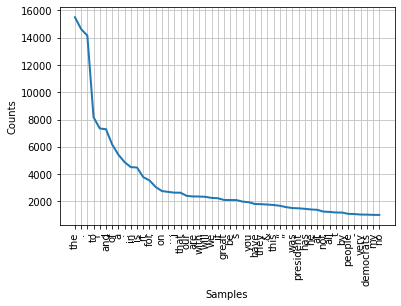

In [12]:
words = []
for tweet in data["text"]:
    words += tweet_tokenizer.tokenize(tweet)

fdist = nltk.FreqDist(words)
fdist.plot(50)

In [13]:
#È´òÈ†ªÂ∫¶„ÅÆ„ÉÑ„Ç§„Éº„Éà„ÇíË°®Á§∫
df_fdist = pd.DataFrame(fdist.most_common(10), columns=['Word', 'Frequency'])
df_fdist

Word  Frequency
0  the      15504
1    .      14634
2    ,      14156
3   to       8172
4    !       7343
5  and       7289
6   of       6165
7    a       5419
8    :       4870
9   in       4507

In [0]:
#token„Å´„Åô„Çã
import re
import string

stemmer = nltk.stem.PorterStemmer()
punctuations = string.punctuation
all_tweets_clean = []

#TweetÊØé„Å´„É™„Çπ„ÉàÂΩ¢Âºè„Åß‰øùÂ≠ò„Åô„Çã„Åü„ÇÅ„ÅÆÂä†Â∑•
result=[]

for tweet in data["text"]:
    # RT„Åã„ÇâÂßã„Åæ„ÇãÈÉ®ÂàÜ„ÇíÂèñ„ÇäÈô§„Åè„ÄÇ
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # „É™„É≥„ÇØ„ÇíÂèñ„ÇäÈô§„Åè„ÄÇ
    tweet = re.sub(r'(http|https):\/\/.*[\r\n]*', '', tweet)
    # „Éè„ÉÉ„Ç∑„É•„Çø„Ç∞„ÇíÂèñ„ÇäÈô§„Åè„ÄÇ
    tweet = re.sub(r'#', '', tweet)
    # Âè•Ë™≠ÁÇπ„ÅÆÂâäÈô§
    tweet = tweet.translate(str.maketrans('', '', string.punctuation)) 
    # ÂçòË™û„Å´ÂàÜËß£„Åô„Çã„ÄÇ
    tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    result.append(tweet_tokens)

In [0]:
stopwords = nltk.corpus.stopwords.words('english')
stop_words = ["‚Üí", "‚Üê", "?", "„Äç", "„Äå","(",")","!",".",",","&","‚Ä¶","%",":",";","‚Äú"]
stopwords += stop_words

#print(stopwords)

result_2=[]
result_3=[]
for i in range(len(result)):
    for word in result[i]:
        if word not in stopwords:
            result_2.append(word)
    result_3.append(result_2)
    result_2=[]

In [0]:
#Word2Vec

from gensim.models import word2vec

In [17]:
# ÂØæË±°„Éá„Éº„Çø„ÇíLinseSentence(one sentence = one line„Å®„Åó„Å¶Êâ±„ÅÜ)„ÅßË™≠„ÅøËæº„ÇÄ

sentences = result_3
sentences[0]

['steventdennis',
 'trump',
 'gets',
 'bump',
 'latest',
 'gallup',
 'poll',
 '49',
 'approval',
 '6',
 'tied',
 'best',
 '47',
 'disapproval',
 '7']

In [0]:
# skip-gram„É¢„Éá„É´„ÅÆÂ≠¶Áøí
skipgram_model = word2vec.Word2Vec(sentences,
                                   sg=1,
                                   size=300,
                                   min_count=10,
                                   window=15, seed=1234)

In [19]:
# ‰ΩúÊàê„Åó„Åü„É¢„Éá„É´„ÅÆ‰øùÂ≠ò
skipgram_model.save("skipgram_w2v.model")
# save„Åó„Åü„É¢„Éá„É´„ÇíË™≠„ÅøËæº„ÇÄÊôÇ„ÅØ
#skipgram_model = word2vec.Word2Vec.load("skipgram_w2v.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [20]:
# coronavirus„Å®‰ºº„Åü„Ç≠„Éº„ÉØ„Éº„Éâ„ÇíË¶ã„Å§„Åë„Å¶„ÅÑ„Åç„Åæ„Åô„ÄÇ
# „Åì„Åì„ÅßË®òËºâ„Åó„Å¶„ÅÑ„Çãscore„ÅØ„ÄÅÂçòË™ûÂêåÂ£´„ÅÆ„Ç≥„Çµ„Ç§„É≥È°û‰ººÂ∫¶„Åß„Åô„ÄÇ
pd.DataFrame(skipgram_model.wv.most_similar(
    positive=["coronavirus"]), columns=["keyword", "score"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


keyword     score
0      covid  0.839506
1         19  0.835481
2   response  0.828846
3     spread  0.809800
4       task  0.805949
5   outbreak  0.785701
6  providing  0.773629
7      force  0.769314
8   briefing  0.763798
9     cdcgov  0.759438

In [0]:
"""
1. ÊäΩÂá∫„Åï„Çå„ÅüÂêÑÂçòË™û„Çí„ÄÅ‰ΩúÊàê„Åó„Åüword2Vec„Å´„Çà„Å£„Å¶„Éô„ÇØ„Éà„É´Âåñ
2. Â§âÊèõ„Åï„Çå„ÅüÂêÑÂçòË™û„Éô„ÇØ„Éà„É´„ÅÆÂπ≥Âùá„Çí„Å®„Çä„ÄÅ„Åù„ÅÆÁµêÊûúÂæó„Çâ„Çå„Åü„Éô„ÇØ„Éà„É´„ÇíË®ò‰∫ã„ÅÆ„Éô„ÇØ„Éà„É´„Å®„Åô„Çã
‰∏äË®ò2„Çπ„ÉÜ„ÉÉ„Éó„ÇíÂÆüË°å„Åô„ÇãÈñ¢Êï∞„Çí‰ΩúÊàê
"""

num_features = 300


def avg_document_vector(data, num_features):
    document_vec = np.zeros((len(data), num_features))
    for i, doc_word_list in enumerate(data):
        feature_vec = np.zeros((num_features,), dtype="float32")
        for word in doc_word_list:
            try:
                feature_vec = np.add(
                    feature_vec, skipgram_model.wv.__getitem__(word))
            except:
                pass

        feature_vec = np.divide(feature_vec, len(doc_word_list))
        document_vec[i] = feature_vec
    return document_vec

In [22]:
X = avg_document_vector(data=sentences, num_features=300)
X.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


(12259, 300)

In [23]:
# outer join
data2 = pd.DataFrame(X)
df_tweets_word2vec =  pd.concat([data, data2], axis=1)
df_tweets_word2vec.head()

date    price  ...       298       299
0  2020-05-01  2830.71  ...  0.063541  0.009408
1  2020-05-01  2830.71  ...  0.045311 -0.001109
2  2020-05-01  2830.71  ...  0.054327  0.028440
3  2020-05-01  2830.71  ...  0.043363  0.024223
4  2020-05-01  2830.71  ...  0.088478  0.041309

[5 rows x 303 columns]

In [0]:
df_tweets_word2vec.to_csv("price_tweets_vector.csv", index=False)

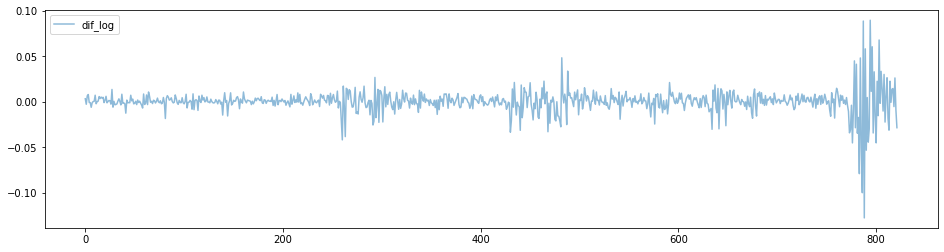

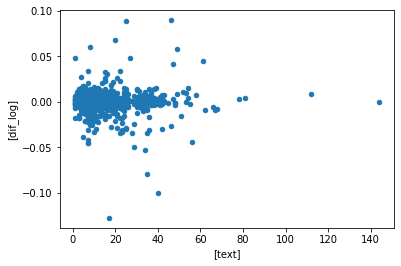

In [24]:
#„ÉÑ„Ç§„Éº„Éà„ÅÆ„Éô„ÇØ„Éà„É´„Çí1Êó•ÊØé„Å´Âπ≥Âùá„Å´„Åô„ÇãÔºà1Êó•10„ÉÑ„Ç§„Éº„Éà„Å†„Å£„ÅüÂ†¥Âêà„Éô„ÇØ„Éà„É´„Å®Ë∂≥„ÅóÂêà„Çè„Åõ10„ÅßÂâ≤„ÇãÔºâ
# groupby #https://qiita.com/propella/items/a9a32b878c77222630ae
df = df_tweets_word2vec.groupby(["date"]).mean()


# target„ÅÆcol„Åß„ÅÇ„ÇãÂ§âÂåñÁéáÔºà"price"„ÅÆÂ∑ÆÂàÜÂØæÊï∞Ë°åÂàóÔºâ„Çídate„ÇíKey„Å´ÂÜÖÈÉ®ÁµêÂêà„Åô„Çã
df_sp = pd.read_csv("/content/sp500-10-year-daily-chart.csv")

# ÊôÇÁ≥ªÂàó„Éá„Éº„Çø„ÅÆÂ∑ÆÂàÜ„ÇíÊ±Ç„ÇÅ„Çã

# " value"„ÅÆË°å„ÇíÂØæÊï∞Âåñ
# https://www.sejuku.net/blog/70027
df_sp["log"] = np.log(df_sp[" value"])

# "log"„ÅÆ1Êó•Ââç„Å®„ÅÆÂ∑Æ„ÇíÂèñ„Å£„Å¶„ÄÅÂ∑ÆÂàÜÂØæÊï∞„ÅÆÂàó„Çí‰ΩúÊàê
# https://note.nkmk.me/python-pandas-diff-pct-change/
df_sp["dif_log"] = df_sp["log"].diff()

#ÂÜÖÈÉ®ÁµêÂêà
df2=pd.merge(df_sp, df, how="inner" ,on="date")
df2 = df2.drop(" value", axis=1)

# groupby„Çí‰Ωø„Å£„Å¶1Êó•„ÅÆ„ÉÑ„Ç§„Éº„ÉàÊï∞„ÇÇÁâπÂæ¥Èáè„Å´Âä†„Åà„Çã
# https://deepage.net/features/pandas-count.html
df3 = df_tweets_word2vec[["date","text"]]
df3 = df3.groupby(["date"]).count()

#ÂÜÖÈÉ®ÁµêÂêà
df4 = pd.merge( df3, df2, how="inner" ,on="date")

#Êó•‰ªò„Éá„Éº„Çø„ÅÆÂΩ¢„ÇíÂ§â„Åà„Çã
df4["date"] = pd.to_datetime(df4['date']).astype('int64')

#Â§âÂåñÁéá„ÅÆ„Ç∞„É©„Éï
df4.plot( y=["dif_log"], figsize=(16,4), alpha=0.5)

#„ÉÑ„Ç§„Éº„ÉàÊï∞„Å®Â§âÂåñÁéá„ÅÆÈñ¢‰øÇ
df4.plot.scatter(x=["text"], y=["dif_log"])

In [25]:
df4.head()

date  text       log  ...       297       298       299
0  1484870400000000000    13  7.728112  ...  0.009629  0.095277 -0.004384
1  1485129600000000000     1  7.725418  ...  0.043648  0.068011 -0.029226
2  1485216000000000000     4  7.731961  ...  0.021533  0.081194 -0.044860
3  1485302400000000000     8  7.739955  ...  0.044931  0.058537  0.007244
4  1485388800000000000    11  7.739220  ...  0.043131  0.079436  0.005099

[5 rows x 305 columns]

In [0]:
#ÁâπÂæ¥Èáè„Å®„Çø„Éº„Ç≤„ÉÉ„Éà„ÇíÊ±∫„ÇÅ„Çã
from sklearn.model_selection import train_test_split

target_col = 'dif_log'
exclude_cols = ['log', 'price', 'dif_log', "date","text"]
feature_cols = []
for col in df4.columns:
    if col not in exclude_cols:
        feature_cols.append(col)
        
X = np.array(df4[feature_cols])
y = np.array(df4[target_col])

In [0]:
#X_train_val, X_test, y_train_val, y_test = train_test_split(
#    X, y, test_size=0.1, random_state=1234)

print('X_train_val Features Shape: ', X_train_val.shape)
print('y_train_val Target Shape: ', y_train_val.shape)
print('X_test Features Shape: ', X_test.shape)
print('y_test Target Shape: ', y_test.shape)

X_train_val Features Shape:  (739, 300)
y_train_val Target Shape:  (739,)
X_test Features Shape:  (83, 300)
y_test Target Shape:  (83,)


In [27]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=1234)

# ÂèÇËÄÉÔºöÂàÜÂâ≤Âæå„ÅÆ„Éá„Éº„ÇøÊï∞„ÇíÁ¢∫Ë™ç
print('X_train Features Shape: ', X_train.shape)
print('y_train Target Shape: ', y_train.shape)
print('X_val Features Shape: ', X_val.shape)
print('y_val Target Shape: ', y_val.shape)

X_train Features Shape:  (657, 300)
y_train Target Shape:  (657,)
X_val Features Shape:  (165, 300)
y_val Target Shape:  (165,)


In [0]:
#ÂàÜÊûêÁî®„ÅÆ„É©„Ç§„Éñ„É©„É™

from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression  # Á∑öÂΩ¢ÂõûÂ∏∞„É¢„Éá„É´„ÅÆ„É©„Ç§„Éñ„É©„É™
from sklearn.metrics import mean_squared_error  # MSE„ÅÆ„É©„Ç§„Éñ„É©„É™
from sklearn.ensemble import RandomForestRegressor

In [29]:
#ÂàÜÊûê1 Á∑öÂΩ¢ÂõûÂ∏∞

from sklearn.linear_model import LinearRegression  # Á∑öÂΩ¢ÂõûÂ∏∞„É¢„Éá„É´„ÅÆ„É©„Ç§„Éñ„É©„É™
from sklearn.metrics import mean_squared_error  # MSE„ÅÆ„É©„Ç§„Éñ„É©„É™

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_val)
lm_mse = mean_squared_error(y_val, y_pred)
print('LinerRegression RMSE: ', round(np.sqrt(lm_mse), 3))

LinerRegression RMSE:  0.018


In [30]:
#ÂàÜÊûê2 Ê±∫ÂÆöÊú®

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=1234)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
dt_mse = mean_squared_error(y_val, y_pred)
print('DecisionTreeRegressor RMSE: ', round(np.sqrt(dt_mse), 3))

DecisionTreeRegressor RMSE:  0.021


In [31]:
#ÂàÜÊûê3 „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=1234)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rf_mse = mean_squared_error(y_val, y_pred)
print('RandomForestRegressor RMSE: ', round(np.sqrt(rf_mse), 3))

RandomForestRegressor RMSE:  0.013


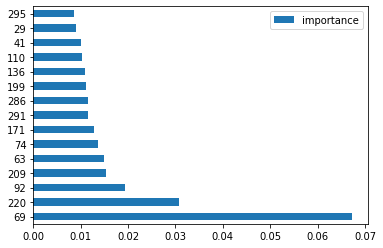

In [32]:
#ÂàÜÊûê3 „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„ÅÆÁâπÂæ¥Èáè

rf_importances = pd.DataFrame(rf.feature_importances_, columns=['importance'], index=feature_cols)
rf_importances.sort_values('importance', ascending=False).iloc[0:15].plot(kind='barh')

In [33]:
#Ôºî„Å§„ÅÆÂàÜÊûê„ÅÆÁµêÊûú„ÅÆÊØîËºÉ

print('Á∑öÂΩ¢ÂõûÂ∏∞„É¢„Éá„É´„ÅÆRMSE:    ', round(np.sqrt(lm_mse), 3))
print('ÂõûÂ∏∞Êú®„ÅÆRMSE:                  ', round(np.sqrt(dt_mse), 3))
print('„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„ÅÆRMSE: ', round(np.sqrt(rf_mse), 3))

Á∑öÂΩ¢ÂõûÂ∏∞„É¢„Éá„É´„ÅÆRMSE:     0.018
ÂõûÂ∏∞Êú®„ÅÆRMSE:                   0.021
„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„ÅÆRMSE:  0.013


In [34]:
#ÂàÜÊûê4 „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„ÅÆ„ÉÅ„É•„Éº„Éã„É≥„Ç∞

# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„Å®„Ç∞„É™„ÉÉ„Éâ„Çµ„Éº„ÉÅ „ÅÆ„É©„Ç§„Éñ„É©„É™
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=1234)

params = {'n_estimators': [10, 25, 50, 100], 'max_depth': [10, 20, 30, 50]}
gscv = GridSearchCV(rf, param_grid=params, verbose=1, cv=3,
                    scoring='neg_mean_squared_error', n_jobs=-1)
gscv.fit(X_train, y_train)

gscv.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.2min finished


{'max_depth': 20, 'n_estimators': 100}

In [35]:
#ÂàÜÊûê4 „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„ÅÆ„ÉÅ„É•„Éº„Éã„É≥„Ç∞
best_estimators = gscv.best_params_["n_estimators"]
best_depth = gscv.best_params_["max_depth"]

rf_best = RandomForestRegressor(n_estimators=best_estimators, max_depth=best_depth, random_state=1234)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_val)
rf_best_mse = mean_squared_error(y_val, y_pred)
print('RandomForest RMSE: ', round(np.sqrt(rf_best_mse), 3))

RandomForest RMSE:  0.013


In [37]:
#ÂàÜÊûê5 „ÉÅ„É•„Éº„Éã„É≥„Ç∞„Åó„Åü„É¢„Éá„É´„Å´„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Çí‰ª£ÂÖ•

y_pred_on_test = rf_best.predict(X_test)
rf_best_test_mse = mean_squared_error(y_test, y_pred_on_test)
print('RandomForest RMSE: ', round(np.sqrt(rf_best_test_mse), 3))

RandomForest RMSE:  0.013


In [0]:
#ÂàÜÊûê5 „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Çí‰ª£ÂÖ•
#Ë™§Â∑Æ„ÇíÂèØË¶ñÂåñ

plt.scatter(y_test, y_pred_on_test)
plt.show()

import seaborn as sns

error_rate = (y_test - y_pred_on_test) / y_test
print('Mean: ', round(np.mean(error_rate), 5))
print('Std: ', round(np.std(error_rate), 5))
sns.distplot(error_rate, kde=False, rug=False, bins=20)

In [38]:
#ÂàÜÊûê6 „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞
#https://hironsan.hatenablog.com/entry/clustering-word-vectors

from collections import defaultdict
from gensim.models.keyedvectors import KeyedVectors
from sklearn.cluster import KMeans

model = KeyedVectors.load('skipgram_w2v.model')
max_vocab = 30000
vocab = list(model.wv.vocab.keys())[:max_vocab]
vectors = [model.wv[word] for word in vocab]

n_clusters = 30
kmeans_model = KMeans(n_clusters=n_clusters, verbose=1, random_state=1234, n_jobs=-1)
kmeans_model.fit(vectors)

cluster_labels = kmeans_model.labels_
cluster_to_words = defaultdict(list)
for cluster_id, word in zip(cluster_labels, vocab):
    cluster_to_words[cluster_id].append(word)

for words in cluster_to_words.values():
    print(words[:10])

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


['trump', 'show', '‚Äù', 'deep', 'general', '2016', 'covering', 'interview', 'quite', 'marthamaccallum']
['gets', 'tied', 'fire', 'ny', 'gave', '8', 'direction', 'strategy', 'bucksexton', 'responsible']
['latest', 'teamtrump', 'president', 'realdonaldtrump', 'leadership', 'first', 'response', 'hughhewitt', 'office', 'team']
['poll', 'approval', 'supporters', '2020', 'election', 'last', 'liberal', 'bernie', 'voters', 'democrat']
['6', 'best', '7', 'point', 'trillion', 'since', 'days', 'history', 'gopchairwoman', 'cut']
['governor', 'vote', 'opponent', 'fighter', 'tom', 'wisconsin', 'jersey', 'kevin', 'state', 'brian']
['michigan', 'see', 'night', 'incredible', 'proud', 'iowa', 'thank', 'morning', 'wonderful', 'tonight']
['give', 'want', '‚Äô', 'aoc', 'late', 'enough', 'run', 'going', 'something', 'drain']
['little', 'put', 'given', 'others', 'would', 'ventilators', 'else', 'spent', 'getting', 'ultimately']
['good', 'people', 'back', 'make', 'one', 'amp', 'pandemic', 'making', 'working',

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


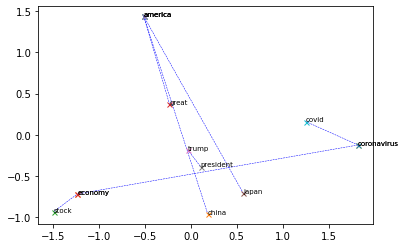

In [39]:
#ÂàÜÊûê7 ‰ºº„Å¶„ÅÑ„ÇãÂçòË™û„Çí„Éó„É≠„ÉÉ„Éà
# https://yoshipc.net/python-word2vec/
 
from gensim.models import word2vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
 
model = word2vec.Word2Vec.load("/content/skipgram_w2v.model")
 
#Ë™ø„Åπ„ÇãÊÉÖÂ†±„ÇíÈÖçÂàó„Å´ÂèéÁ¥ç
trump_word = []
trump_word.append(["america","china"])
trump_word.append(["america","great"])
trump_word.append(["america","japan"])
trump_word.append(["trump","president"])
trump_word.append(["coronavirus","covid"])
trump_word.append(["coronavirus","economy"])
trump_word.append(["stock","economy"])

length = len(trump_word)
data = []
 
j = 0
while j < length:
    #print(trump_word[j][1])
    data.append(model[trump_word[j][0]])
    data.append(model[trump_word[j][1]])
    j += 1
 
pca = PCA(n_components=2)
pca.fit(data)
data_pca= pca.transform(data)
 
length_data = len(data_pca)
 
i = 0
j = 0
while i < length_data:
    #ÁÇπ„Éó„É≠„ÉÉ„Éà
    plt.plot(data_pca[i][0], data_pca[i][1], ms=5.0, zorder=2 ,marker="x")
    plt.plot(data_pca[i+1][0], data_pca[i+1][1],ms=5.0, zorder=2 ,marker="x")
 
    #Á∑ö„Éó„É≠„ÉÉ„Éà
    plt.plot((data_pca[i][0], data_pca[i+1][0]),(data_pca[i][1],data_pca[i+1][1]),c="b",linewidth=0.5,zorder=1,linestyle="--")
 
    #ÊñáÂ≠ó„Éó„É≠„ÉÉ„Éà
    plt.annotate(trump_word[j][0],(data_pca[i][0], data_pca[i][1]),size=7)
    plt.annotate(trump_word[j][1],(data_pca[i+1][0], data_pca[i+1][1]),size=7)
 
    j += 1
    i += 2
 
plt.show()

In [0]:
#ÂàÜÊûê8 DeepLearning
#„É©„Ç§„Éñ„É©„É™„Çí„Ç§„É≥„Éù„Éº„Éà

import numpy as np
import pandas as pd
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [0]:
class myMLP(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.ln1 = nn.Linear(in_features, 256)
        self.ln2 = nn.Linear(256, 128)
        self.ln3 = nn.Linear(128, 32)
        self.ln4 = nn.Linear(32, 64)
        self.ln5 = nn.Linear(64, 32)
        self.ln6 = nn.Linear(32, 4)
        self.ln7 = nn.Linear(4, out_features)

    def forward(self, x):
        x = self.ln1(x)
        x = F.relu(x)
        x = self.ln2(x)
        x = F.relu(x)
        x = self.ln3(x)
        x = F.relu(x)
        x = self.ln4(x)
        x = F.relu(x)
        x = self.ln5(x)
        x = F.relu(x)
        x = self.ln6(x)
        x = F.relu(x)
        x = self.ln7(x)
        return x

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([57])) that is different to the input size (torch.Size([57, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([165])) that is different to the input size (torch.Size([165, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input

test_loss:  tensor(0.0001, grad_fn=<DivBackward0>)


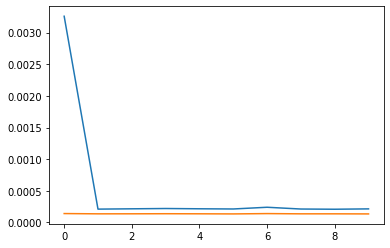

In [42]:
#ÂàÜÊûê8 DeepLearning
# NumPy„ÅÆarry„Çítorch.tensorÂûã„Å´Â§âÊèõ„Åô„Çã„ÄÇ

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

#„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÊõ∏„Åè
net = myMLP(300,1)
net.parameters

#ÁõÆÁöÑÈñ¢Êï∞„ÇíÊåáÂÆöÔºà‰ªäÂõû„ÅØÂõûÂ∏∞ÂïèÈ°å„ÅÆ„Åü„ÇÅMSELoss()„Çí‰ΩøÁî®„Åô„ÇãÔºâ
#https://pytorch.org/docs/stable/nn.html#loss-functions
loss_func = nn.MSELoss()
#Optimizer„ÇíÂÆöÁæ©„Åô„Çã
#https://pytorch.org/docs/stable/optim.html
optimizer = optim.RMSprop(net.parameters())
  
train_loss_track = []
test_loss_track = []

for epoc in range(10):
    running_loss = 0
    
    # Â≠¶Áøí„É¢„Éº„Éâ
    net.train()
    for step, (xx, yy)  in enumerate(train_loader):
        
        # ÊúÄÂæå„Å´Ë®àÁÆó„Åó„ÅüÂêÑ„Éë„É©„É°„Éº„Çø„Éº„ÅÆÂãæÈÖç„ÇíÂàùÊúüÂåñ„Åô„Çã
        optimizer.zero_grad()
        
        # „Éï„Ç©„ÉØ„Éº„ÉâË®àÁÆó„ÇíË°å„ÅÜ
        y_pred = net(xx).float()
        
        # Ë™§Â∑ÆÈñ¢Êï∞„Çí‰Ωø„Å£„Å¶„ÇÆ„É£„ÉÉ„Éó„ÅÆË®àÊ∏¨
        loss = loss_func(y_pred, yy)
      
        # Ë™§Â∑ÆÈÄÜ‰ºùÊí≠Ê≥ï„Çí‰Ωø„Å£„Å¶Ëá™ÂãïÂæÆÂàÜ
        loss.backward()
        
        # „Éë„É©„É°„Éº„Çø„Éº„ÇíÊõ¥Êñ∞
        optimizer.step()
        
        # Â≠¶Áøí„Éá„Éº„Çø„Çí‰Ωø„Å£„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
        running_loss += loss.item()
        
    # „Ç®„Éù„ÉÉ„ÇØ„ÅåÁµÇ‰∫Ü„Åó„Åü„ÇâÂπ≥ÂùáË™§Â∑Æ„ÇíË®àÁÆó
    train_loss_track.append(running_loss/step)
    
    
    #Ë©ï‰æ°ÔºàevaluationÔºâ„É¢„Éº„Éâ
    net.eval()
    
    # ‰∫àÊ∏¨ÂÄ§„ÇíË®àÁÆó
    y_pred = net(X_test_tensor)
    
    # Ë™§Â∑ÆÈñ¢Êï∞„ÇíË®àÁÆó
    test_loss = loss_func(y_pred, y_test_tensor)
    
    # Ë™§Â∑Æ„Çí„Éà„É©„ÉÉ„Ç≠„É≥„Ç∞
    test_loss_track.append(test_loss)



plt.plot(train_loss_track)
plt.plot(test_loss_track)
print("test_loss: ",sum(test_loss_track)/len(test_loss_track))

RandomForestRegressor RMSE:  0.016
['confident']
['coronavirus']
['declare']
['nationwide']
['duly']
['spreading']
['covid19']
['practice']
['cutter']
['outbreak']
['545']
['prevail']
['billcassidy']
['restaurants']
['jack']


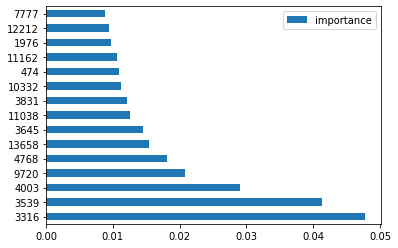

In [43]:
#ÂàÜÊûê9„ÄÄTFIDF„ÇíÁî®„ÅÑ„Åü„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà

#ÂΩ¢ÊÖãÁ¥†Ëß£Êûê„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„Éà„Çí‰Ωú„Çã
#https://qiita.com/tomone_hata/items/67e7f9415dbf5c8ff8ba

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#ÂΩ¢ÊÖãÁ¥†Ëß£Êûê„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„Éà„Çí‰Ωú„Çã
#ÊñáÁ´†„ÇíÂÖ®ÈÉ®Ôºë„Å§„ÅÆ„É™„Çπ„Éà„Å´ÂÖ•„Çå„Çã‚ÜíTFIDF„Çí‰Ωú„Çã‚Üí„Åù„Çå„Åû„Çå„ÅÆÊó•‰ªò„Å´Âá∫„Å¶„Åè„ÇãÂçòË™û„ÇíKey„Å´TFIDF„ÅÆÂÄ§„ÇíÂèñ„Å£„Å¶„Åè„Çã

data_keitaiso = pd.read_csv("s&p_tweets.csv")
tweet_keitaiso=[]

for tweet in data_keitaiso["text"]:
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'(http|https):\/\/.*[\r\n]*', '', tweet)
  tweet = re.sub(r'#', '', tweet)
  tweet = tweet.translate(str.maketrans('', '', string.punctuation)) 
  tweet_keitaiso.append(tweet)

corpus = tweet_keitaiso         
cv = CountVectorizer(token_pattern=r"\b\w+\b")
wc = cv.fit_transform(corpus)
ttf = TfidfTransformer()
tfidf = ttf.fit_transform(wc)

#ËúúË°åÂàó„Å´Â§âÊõ¥„Åô„Çã
X_tfidf = tfidf.toarray()

data3 = pd.DataFrame(X_tfidf)
df_tweets_tfidf =  pd.concat([data_keitaiso, data3], axis=1)

df = df_tweets_tfidf.groupby(["date"]).mean()
df_sp = pd.read_csv("/content/sp500-10-year-daily-chart.csv")
df_sp["log"] = np.log(df_sp[" value"])
df_sp["dif_log"] = df_sp["log"].diff()
df2=pd.merge(df_sp, df, how="inner" ,on="date")
df2 = df2.drop(" value", axis=1)
df3 = df_tweets_tfidf[["date","text"]]
df3 = df3.groupby(["date"]).count()
df_tfidf = pd.merge( df3, df2, how="inner" ,on="date")
df_tfidf["date"] = pd.to_datetime(df4['date']).astype('int64')

from sklearn.model_selection import train_test_split

target_col = 'dif_log'
exclude_cols = ['log', 'price', 'dif_log', "date","text"]
feature_cols = []
for col in df_tfidf.columns:
    if col not in exclude_cols:
        feature_cols.append(col)
        
X2 = np.array(df_tfidf[feature_cols])
y2 = np.array(df_tfidf[target_col])

XÔºí_train_val, XÔºí_test, yÔºí_train_val, yÔºí_test = train_test_split(
    XÔºí, yÔºí, test_size=0.1, random_state=1234)

XÔºí_train, XÔºí_val, yÔºí_train, yÔºí_val = train_test_split(
    XÔºí_train_val, yÔºí_train_val, test_size=0.1, random_state=1234)

#ÂàÜÊûê
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=1234)
rf.fit(XÔºí_train, yÔºí_train)
yÔºí_pred = rf.predict(XÔºí_val)
rf_mse_2 = mean_squared_error(yÔºí_val, yÔºí_pred)
print('RandomForestRegressor RMSE: ', round(np.sqrt(rf_mse_2), 3))

#„Éó„É≠„ÉÉ„Éà
rf_importances = pd.DataFrame(rf.feature_importances_, columns=['importance'], index=feature_cols)
rf_importances.sort_values('importance', ascending=False).iloc[0:15].plot(kind='barh')

#ÂàóÂêç„Çí„Ç≤„ÉÉ„Éà
#https://note.nkmk.me/python-dict-get-key-from-value/

voca = cv.vocabulary_

def get_keys_from_value(d, val):
    return [k for k, v in d.items() if v == val]

for i in rf_importances.sort_values('importance', ascending=False).iloc[0:15].index:
  keys = get_keys_from_value(voca, i)
  print(keys)
# ['key1', 'key2']

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([57])) that is different to the input size (torch.Size([57, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([165])) that is different to the input size (torch.Size([165, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input

test_loss:  tensor(0.0007, grad_fn=<DivBackward0>)


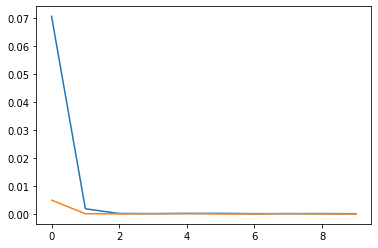

In [44]:
#ÂàÜÊûê10„ÄÄÂΩ¢ÊÖãÁ¥†Ëß£Êûê„ÅßDeepLearning

X2_train, X2_test, y2_train, y2_test = train_test_split(
    XÔºí, y2, test_size=0.2, random_state=1234)

X2_train_tensor = torch.tensor(X2_train, dtype=torch.float32)
y2_train_tensor = torch.tensor(y2_train, dtype=torch.float32)
X2_test_tensor = torch.tensor(X2_test, dtype=torch.float32)
y2_test_tensor = torch.tensor(y2_test, dtype=torch.float32)

train2_dataset = TensorDataset(X2_train_tensor, y2_train_tensor)
train2_loader = DataLoader(train2_dataset, batch_size=100, shuffle=True)

#„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÇíÊõ∏„Åè
net = myMLP(16493,1)
net.parameters

#ÁõÆÁöÑÈñ¢Êï∞„ÇíÊåáÂÆöÔºà‰ªäÂõû„ÅØÂõûÂ∏∞ÂïèÈ°å„ÅÆ„Åü„ÇÅMSELoss()„Çí‰ΩøÁî®„Åô„ÇãÔºâ
#https://pytorch.org/docs/stable/nn.html#loss-functions
loss_func = nn.MSELoss()
#Optimizer„ÇíÂÆöÁæ©„Åô„Çã
#https://pytorch.org/docs/stable/optim.html
optimizer = optim.RMSprop(net.parameters())
  
train_loss_track = []
test_loss_track = []

for epoc in range(10):
    running_loss = 0
    
    # Â≠¶Áøí„É¢„Éº„Éâ
    net.train()
    for step, (xx, yy)  in enumerate(train2_loader):
        
        # ÊúÄÂæå„Å´Ë®àÁÆó„Åó„ÅüÂêÑ„Éë„É©„É°„Éº„Çø„Éº„ÅÆÂãæÈÖç„ÇíÂàùÊúüÂåñ„Åô„Çã
        optimizer.zero_grad()
        
        # „Éï„Ç©„ÉØ„Éº„ÉâË®àÁÆó„ÇíË°å„ÅÜ
        y_pred = net(xx).float()
        
        # Ë™§Â∑ÆÈñ¢Êï∞„Çí‰Ωø„Å£„Å¶„ÇÆ„É£„ÉÉ„Éó„ÅÆË®àÊ∏¨
        loss = loss_func(y_pred, yy)
      
        # Ë™§Â∑ÆÈÄÜ‰ºùÊí≠Ê≥ï„Çí‰Ωø„Å£„Å¶Ëá™ÂãïÂæÆÂàÜ
        loss.backward()
        
        # „Éë„É©„É°„Éº„Çø„Éº„ÇíÊõ¥Êñ∞
        optimizer.step()
        
        # Â≠¶Áøí„Éá„Éº„Çø„Çí‰Ωø„Å£„Å¶Ë™§Â∑Æ„ÇíË®àÁÆó
        running_loss += loss.item()
        
    # „Ç®„Éù„ÉÉ„ÇØ„ÅåÁµÇ‰∫Ü„Åó„Åü„ÇâÂπ≥ÂùáË™§Â∑Æ„ÇíË®àÁÆó
    train_loss_track.append(running_loss/step)
    
    
    #Ë©ï‰æ°ÔºàevaluationÔºâ„É¢„Éº„Éâ
    net.eval()
    
    # ‰∫àÊ∏¨ÂÄ§„ÇíË®àÁÆó
    y_pred = net(X2_test_tensor)
    
    # Ë™§Â∑ÆÈñ¢Êï∞„ÇíË®àÁÆó
    test_loss = loss_func(y_pred, y2_test_tensor)
    
    # Ë™§Â∑Æ„Çí„Éà„É©„ÉÉ„Ç≠„É≥„Ç∞
    test_loss_track.append(test_loss)



plt.plot(train_loss_track)
plt.plot(test_loss_track)
print("test_loss: ",sum(test_loss_track)/len(test_loss_track))

In [45]:
#ÂàÜÊûê11 „Ç¢„É≥„Çµ„É≥„Éñ„É´Â≠¶Áøí
# https://blog.ikedaosushi.com/entry/2018/10/21/204842?t=0

random_state = 1234

X_train_valid, X_meta_valid, y_train_valid, y_meta_valid = train_test_split(X, y, test_size=0.1, random_state=random_state)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.1, random_state=random_state)

import lightgbm as lgb
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

# train base model
base_model_1 = LinearRegression()
base_model_2 = LGBMRegressor()
base_model_3 = KNeighborsRegressor()

base_model_1.fit(X_train, y_train)
base_model_2.fit(X_train, y_train)
base_model_3.fit(X_train, y_train)

# base predicts
base_pred_1 = base_model_1.predict(X_valid)
base_pred_2 = base_model_2.predict(X_valid)
base_pred_3 = base_model_3.predict(X_valid)

# test predicts for final result 
valid_pred_1 = base_model_1.predict(X_meta_valid)
valid_pred_2 = base_model_2.predict(X_meta_valid)
valid_pred_3 = base_model_3.predict(X_meta_valid)

print ("mean squared error of model 1: {:.4f}".format(mean_squared_error(y_meta_valid, valid_pred_1)) )
print ("mean squared error of model 2: {:.4f}".format(mean_squared_error(y_meta_valid, valid_pred_2)) )
print ("mean squared error of model 3: {:.4f}".format(mean_squared_error(y_meta_valid, valid_pred_3)) )

# stack base predicts for training meta model
stacked_predictions = np.column_stack((base_pred_1, base_pred_2, base_pred_3))

# stack test predicts for final result 
stacked_valid_predictions = np.column_stack((valid_pred_1, valid_pred_2, valid_pred_3))

# train meta model 
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_valid)

# final result 
meta_valid_pred = meta_model.predict(stacked_valid_predictions)
print ("mean squared error of meta model: {:.4f}".format(mean_squared_error(y_meta_valid, meta_valid_pred)) )


mean squared error of model 1: 0.0003
mean squared error of model 2: 0.0001
mean squared error of model 3: 0.0002
mean squared error of meta model: 0.0002


In [0]:
#‰∏äÊâã„Åè„ÅÑ„Å£„Å¶„Å™„ÅÑ
#ÂàÜÊûê6 Doc2Vec„Åß„ÉÑ„Ç§„Éº„Éà„Çí„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞„Åô„Çã‚ë†
#https://qiita.com/g-k/items/5ea94c13281f675302ca

#from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#from gensim import models

#documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sentences)]
#model = Doc2Vec(documents, vector_size=300, window=5, min_count=1, workers=4)
#model.save("doc2_w2v.model")

In [0]:
#‰∏äÊâã„Åè„ÅÑ„Å£„Å¶„Å™„ÅÑ
#ÂàÜÊûê6 Doc2Vec„Åß„ÉÑ„Ç§„Éº„Éà„Çí„ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞„Åô„Çã‚ë°
#https://qiita.com/naotaka1128/items/e617f63907fed035408a

#model = models.Doc2Vec.load('/content/doc2_w2v.model')

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def draw_word_scatter(word, topn=30):
    """ ÂÖ•Âäõ„Åï„Çå„Åüword„Å´‰ºº„Å¶„ÅÑ„ÇãÂçòË™û„ÅÆÂàÜÂ∏ÉÂõ≥„ÇíÊèè„Åè„Åü„ÇÅ„ÅÆ„É°„ÇΩ„ÉÉ„Éâ """

    # ‰ºº„Å¶„ÅÑ„ÇãÂçòË™û„ÇíÊ±Ç„ÇÅ„Çã„Åü„ÇÅ„Å´„ÅØGensim word2vec„ÅÆ‰ª•‰∏ã„ÅÆÊ©üËÉΩ„ÇíÂà©Áî®
    # model.most_similar(word, topn=topn)
    words = [x[0] for x in sorted(model.most_similar(word, topn=topn))]
    words.append(word)

    # ÂêÑÂçòË™û„ÅÆ„Éô„ÇØ„Éà„É´Ë°®Áèæ„ÇíÊ±Ç„ÇÅ„Åæ„Åô„ÄÇGensim„ÅÆmost_similar„Çí„Éô„Éº„Çπ„Å®„Åó„Å¶
    # ÂçòË™û„ÅÆ„Éô„ÇØ„Éà„É´„ÇíËøî„Åô„É°„ÇΩ„ÉÉ„Éâ(model.calc_vec)„ÇíÂÆöÁæ©„Åó„Å¶„ÅÑ„Åæ„Åô
    # Èï∑„Åè„Å™„Çã„ÅÆ„ÅßÂÆüË£Ö„ÅØÊú¨Á®ø„ÅÆÊú´Â∞æ„Å´Ë®òËºâ„Åó„Åæ„Åó„Åü„ÄÇ
    vecs = [model.calc_vec(word) for word in words]

    # ÂàÜÂ∏ÉÂõ≥
    draw_scatter_plot(vecs, words)

def draw_scatter_plot(vecs, tags, clusters):
    """ ÂÖ•Âäõ„Åï„Çå„Åü„Éô„ÇØ„Éà„É´„Å´Âü∫„Å•„ÅçÊï£Â∏ÉÂõ≥(„É©„Éô„É´‰ªò„Åç)„ÇíÊèè„Åè„Åü„ÇÅ„ÅÆ„É°„ÇΩ„ÉÉ„Éâ """

    # Scikit-learn„ÅÆPCA„Å´„Çà„ÇãÊ¨°ÂÖÉÂâäÊ∏õ„Å®„Åù„ÅÆÂèØË¶ñÂåñ
    pca = PCA(n_components=2)
    coords = pca.fit_transform(vecs)

    # matplotlib„Å´„Çà„ÇãÂèØË¶ñÂåñ
    fig, ax = plt.subplots()
    x = [v[0] for v in coords]
    y = [v[1] for v in coords]

    # ÂêÑÁÇπ„ÅÆ„ÇØ„É©„Çπ„Çø„Éº„ÅåË®≠ÂÆö„Åï„Çå„Å¶„ÅÑ„Çå„Å∞„ÇØ„É©„Çπ„Çø„ÇíËÄÉÊÖÆ
    # „Ç®„É©„Éº„Éè„É≥„Éâ„É™„É≥„Ç∞„ÅØÈÅ©ÂΩì
    if clusters:
        ax.scatter(x, y, c=clusters)
    else:
        ax.scatter(x, y)

    for i, txt in enumerate(tags):
        ax.annotate(txt, (coords[i][0], coords[i][1]))
    plt.show()
    
#draw_word_scatter('coronavirus', topn=40)

In [0]:
#„ÄÄ„Åæ„Å†„Åß„Åç„Å¶„ÅÑ„Å™„ÅÑ
# „É¢„Éá„É´„ÅÆÁ≤æÂ∫¶„ÇíÁ¢∫Ë™ç„Åô„Çã
# https://note.com/uki_profit/n/nab22a04262f9